In [1]:
from scipy.spatial import Voronoi, ConvexHull
from voronoi import*
import numpy as np
import matplotlib.pyplot as plt

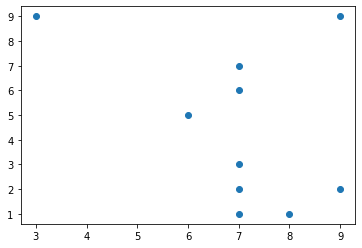

In [2]:
points = np.random.choice(range(10), size=(10,2))
fig, ax = plt.subplots(1,1)
ax.scatter(points[:,0], points[:,1])

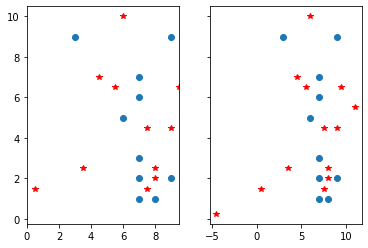

In [3]:
vor = Voronoi(points)
rdict = vor.ridge_dict
r_points = vor.ridge_points
r_vertices = vor.ridge_vertices
vertices = vor.vertices
fig, ax = plt.subplots(1,2,sharey=True)
ax[0].scatter(points[:,0], points[:,1])
ax[0].plot(vertices[:,0], vertices[:,1], '*', c='r')
ax[0].set_xlim([0,9.5])
ax[1].scatter(points[:,0], points[:,1])
ax[1].plot(vertices[:,0], vertices[:,1], '*', c='r')

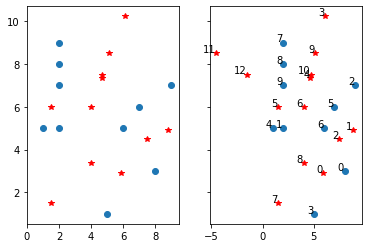

In [49]:
fig, ax = plt.subplots(1,2,sharey=True)
ax[0].scatter(points[:,0], points[:,1])
ax[0].plot(vertices[:,0], vertices[:,1], '*', c='r')
ax[0].set_xlim([0,9.5])
ax[1].scatter(points[:,0], points[:,1])
ax[1].plot(vertices[:,0], vertices[:,1], '*', c='r')
for i, mark in enumerate(vertices):
    ax[1].text(mark[0]-.05, mark[1]+.05, i, ha= 'right')
for k, mark2 in enumerate(points):
    ax[1].text(mark2[0]-.05, mark2[1]+.05, k, ha= 'right')

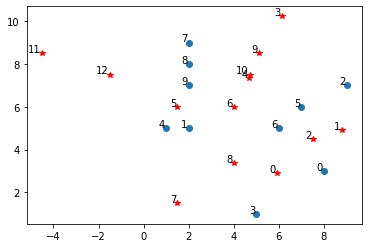

In [50]:
fig, ax = plt.subplots(1,1)
ax.scatter(points[:,0], points[:,1])
ax.plot(vertices[:,0], vertices[:,1], '*', c='r')
for i, mark in enumerate(vertices):
    ax.text(mark[0]-.05, mark[1]+.05, i, ha= 'right')
for k, mark2 in enumerate(points):
    ax.text(mark2[0]-.05, mark2[1]+.05, k, ha= 'right')

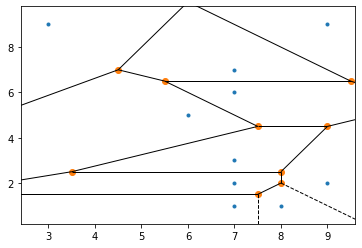

In [4]:
from scipy.spatial import voronoi_plot_2d
fig, ax = plt.subplots(1,1, )

fig = voronoi_plot_2d(vor, ax=ax, show_points=1, show_vertices=1)


In [ ]:
fig, ax = plt.subplots(1,2,sharey=True)
ax[0].scatter(points[:,0], points[:,1])
ax[0].plot(vertices[:,0], vertices[:,1], '*', c='r')
ax[0].set_xlim([0,9.5])
ax[1].scatter(points[:,0], points[:,1])
ax[1].plot(vertices[:,0], vertices[:,1], '*', c='r')

In [37]:
vor.points

array([[8., 3.],
       [2., 5.],
       [9., 7.],
       [5., 1.],
       [1., 5.],
       [7., 6.],
       [6., 5.],
       [2., 9.],
       [2., 8.],
       [2., 7.]])

In [38]:
vor.vertices

array([[ 5.9       ,  2.9       ],
       [ 8.78571429,  4.92857143],
       [ 7.5       ,  4.5       ],
       [ 6.13636364, 10.22727273],
       [ 4.66666667,  7.33333333],
       [ 1.5       ,  6.        ],
       [ 4.        ,  6.        ],
       [ 1.5       ,  1.5       ],
       [ 4.        ,  3.375     ],
       [ 5.1       ,  8.5       ],
       [ 4.7       ,  7.5       ],
       [-4.5       ,  8.5       ],
       [-1.5       ,  7.5       ]])

In [41]:
vor.ridge_vertices

[[0, 2],
 [-1, 0],
 [-1, 1],
 [1, 2],
 [-1, 3],
 [1, 3],
 [5, 6],
 [5, 7],
 [6, 8],
 [7, 8],
 [0, 8],
 [2, 4],
 [4, 6],
 [-1, 7],
 [9, 10],
 [9, 11],
 [10, 12],
 [11, 12],
 [3, 9],
 [4, 10],
 [-1, 11],
 [5, 12]]

In [59]:
vor.vertices[r_vertices[0]]

array([[5.9, 2.9],
       [7.5, 4.5]])

In [42]:
vor.regions

[[],
 [2, 0, -1, 1],
 [3, -1, 1],
 [8, 6, 5, 7],
 [8, 0, 2, 4, 6],
 [8, 0, -1, 7],
 [12, 10, 9, 11],
 [10, 4, 2, 1, 3, 9],
 [11, -1, 3, 9],
 [12, 5, 6, 4, 10],
 [12, 5, 7, -1, 11]]

In [56]:
vor.point_region

array([ 1,  3,  2,  5, 10,  7,  4,  8,  6,  9], dtype=int64)

In [44]:
vor.points[vor.regions[1]]

array([[9., 7.],
       [8., 3.],
       [2., 7.],
       [2., 5.]])

In [45]:
vor.vertices[vor.regions[1]]

array([[ 7.5       ,  4.5       ],
       [ 5.9       ,  2.9       ],
       [-1.5       ,  7.5       ],
       [ 8.78571429,  4.92857143]])

In [53]:
vor.vertices[vor.regions[5]]

array([[ 4.   ,  3.375],
       [ 5.9  ,  2.9  ],
       [-1.5  ,  7.5  ],
       [ 1.5  ,  1.5  ]])

In [63]:
cc = vor.vertices.ptp(axis=0)

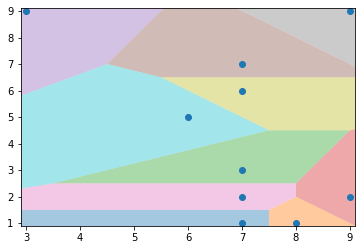

In [5]:
regions, vertices = voronoi_finite_polygons_2d(vor)

# colorize
for region in regions:
    polygon = vertices[region]
    plt.fill(*zip(*polygon), alpha=0.4)

plt.plot(vor.points[:,0], vor.points[:,1], 'o')
plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)

plt.show()

In [6]:
a, b = FrameDetect(vor, extent=[0,10])

In [7]:
result = {}
for cellidx, ridx in a.items():
    cc= [b[i] for i in ridx]
    result.setdefault(cellidx, cc)
        

In [9]:
r_ = np.concatenate(result[1], axis=0).reshape(5,2)


In [10]:
contain1 = fit_ellipse(r_[:,0], r_[:,1])

In [11]:
para = cart_to_pol(contain1)

In [12]:
sss = para[2]/para[3]

In [13]:
conv = Convexity(a, b)